In [2]:
import pandas as pd
import plotly.graph_objects as go
from scipy.cluster.hierarchy import  dendrogram,linkage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from scipy.spatial.distance import pdist
import numpy as np

In [3]:
import os 
project_path = os.getcwd()
root_path = os.path.abspath(os.path.join(project_path, os.pardir))
file_path = os.path.join(root_path,'data/dataframe_test.csv')
df = pd.read_csv(file_path)
print(df.head())

   id  month care_status  sex  age  education  wealth  distance_clinic
0   3    0.0           D  1.0  1.0        2.0     2.0              1.0
1   3    1.0           D  1.0  1.0        2.0     2.0              1.0
2   3    2.0           D  1.0  1.0        2.0     2.0              1.0
3   3    3.0           D  1.0  1.0        2.0     2.0              1.0
4   3    4.0           D  1.0  1.0        2.0     2.0              1.0


id = "Identifiant Patient",
month = "Mois depuis la diagnostic",
care_status = "Statut dans les soins",
wealth = "Niveau de richesse",
distance_clinic = "Distance à la clinique la plus proche"

In [4]:
events= list(df["care_status"].unique())
events

['D', 'T', 'C', 'S']

"diagnostiqué, mais pas suivi" = "D",
"suivi, mais pas sous traitement" = "C",
"sous traitement, mais infection non contrôlée" = "T",
"sous traitement et infection contrôlée" = "S"

les données sont en forme longues 

In [5]:
# Sélectionner les colonnes id, month et care_status
selected_cols = df[['id', 'month', 'care_status']]
# Pivoter les données
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')
# Renommer les colonnes avec un préfixe "m"
pivoted_data.columns = ['m' + str(col) for col in pivoted_data.columns]

pivoted_data

,m0.0,m1.0,m2.0,m3.0,m4.0,m5.0,m6.0,m7.0,m8.0,m9.0,...,m41.0,m42.0,m43.0,m44.0,m45.0,m46.0,m47.0,m48.0,m49.0,m50.0
id,,,,,,,,,,,,,,,,,,,,,
3,D,D,D,D,D,D,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,D,D,D,D,D,D,D,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,D,D,D,D,T,T,T,C,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,D,D,S,S,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,D,C,C,T,T,T,T,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,D,C,T,T,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Define colors for treatments
colors = ['red', 'blue', 'green', 'yellow']

# Create a figure
fig = go.Figure()

# Iterate over treatments
for treatment, color in zip(events, colors):
    # Extract data for the current treatment
    treatment_data = pivoted_data[pivoted_data.eq(treatment).any(axis=1)]
    # Get the columns representing months
    months = treatment_data.columns
    # Calculate the percentage of patients under the current treatment for each month
    percentages = (treatment_data.apply(lambda x: x.value_counts().get(treatment, 0)) / len(treatment_data)) * 100
    # Plot the curve for the percentage of patients under the treatment over time
    fig.add_trace(go.Scatter(x=months, y=percentages, mode='lines', name=treatment, line=dict(color=color)))

# Update layout
fig.update_layout(
    title='Percentage of Patients under Each Treatment Over Time',
    xaxis_title='Time',
    yaxis_title='Percentage of Patients',
    legend_title='Treatment',
    yaxis=dict(tickformat=".2f")
)

# Display the graph
fig.show()

In [9]:
drug_mapping = {"D":2, "C":4, "T":6, "S":8}
df_subsets_numeriques = pivoted_data.replace(drug_mapping)
df_subsets_numeriques

,m0.0,m1.0,m2.0,m3.0,m4.0,m5.0,m6.0,m7.0,m8.0,m9.0,...,m41.0,m42.0,m43.0,m44.0,m45.0,m46.0,m47.0,m48.0,m49.0,m50.0
id,,,,,,,,,,,,,,,,,,,,,
3,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2,2.0,2.0,2.0,6.0,6.0,6.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,2,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,2,4.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_random_sample = df_subsets_numeriques.sample(n=300)
df_random_sample.shape

(300, 51)

## Clustering avec la distance de Hamming

In [90]:
# data_array_ham = df_random_sample.to_numpy()

data_array_ham = df_subsets_numeriques.to_numpy()

distance_matrix_ham = pdist(data_array_ham, 'hamming') 
len(distance_matrix_ham)

4288056

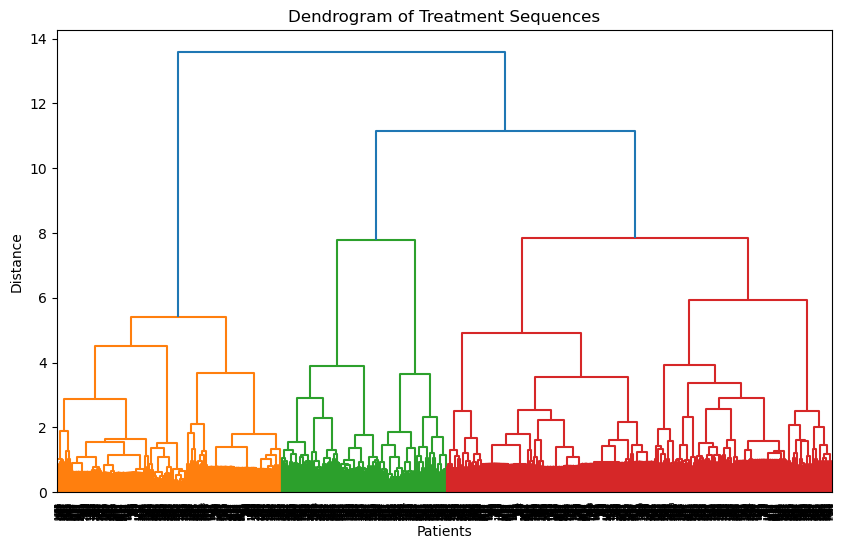

In [91]:
linkage_matrix_ham = linkage(distance_matrix_ham, method='ward',optimal_ordering=True)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_ham)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [92]:
leaves_order_ham = list(hierarchy.leaves_list(linkage_matrix_ham))
data_array_ham_order = data_array_ham[leaves_order_ham]
colors = ['blue', 'orange', 'green', 'red']
heatmap_ham = go.Heatmap(z=data_array_ham_order, colorscale= 'viridis')

# Créer une figure
fig = go.Figure(data=heatmap_ham)
fig.update_layout(
    title='TCA with Hamming Distance',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

## Clustering avec la méthode Optimal Matching

In [85]:
def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
    m, n = len(seq1), len(seq2)
    score_matrix = np.zeros((m+1, n+1))

    # Initialisation de la matrice de scores
    for i in range(m+1):
        score_matrix[i, 0] = gap_penalty * i
    for j in range(n+1):
        score_matrix[0, j] = gap_penalty * j

    # Remplissage de la matrice de scores
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1, j] + gap_penalty
            insert = score_matrix[i, j-1] + gap_penalty
            score_matrix[i, j] = max(match, delete, insert)

    # Score d'alignement optimal
    optimal_score = score_matrix[m, n]

    return optimal_score#, score_matrix

def sequence_distance(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
    optimal_score = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    max_length = max(len(seq1), len(seq2))
    normalized_score = optimal_score / max_length
    distance = 1 - normalized_score
    return distance



distances = []
for i in range(len(df_subsets_numeriques)):
    for j in range(i + 1, len(df_subsets_numeriques)):
        seq1 = df_subsets_numeriques.iloc[i].dropna().values
        seq2 = df_subsets_numeriques.iloc[j].dropna().values
        # optimal_score, scores_matrix = needleman_wunsch(first_array_nw, second_array_nw)
        distances.append(sequence_distance(seq1, seq2))

    # break 

distance_matrix_nw = np.array(distances)

In [106]:
n = len(df_subsets_numeriques)
m = len(df_subsets_numeriques.iloc[0])
distance_matrix = np.zeros((n, m))
distance_matrix.shape

(2929, 51)

In [113]:
for i in range(n):
    for j in range(i + 1, n):

        seq1 = df_subsets_numeriques.iloc[i].dropna().values
        seq2 = df_subsets_numeriques.iloc[j].dropna().values
        len1, len2 = len(seq1), len(seq2)
        dp = np.zeros((len1 + 1, len2 + 1))

        print(seq1[:len1])

        # print(substitution_cost_matrix(len(dp)))[seq1[:len1, None], seq2[:len2]]

        break


        # Calculate the substitution cost matrix for the current pair of sequences
        # substitution_cost = substitution_cost_matrix(len(dp))[seq1[:len1, None], seq2[:len2]]

[2. 2. 2. 2. 2. 2.]
[2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 6. 6. 6. 4. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 6. 6. 6. 6. 6. 6. 6. 6. 6.]
[2. 2. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2.]
[2. 4. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
[2. 2. 2. 2. 4. 6. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 4. 6. 6. 6. 6. 6. 6. 6. 6. 6. 8.]
[2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 4. 8. 8. 8. 8. 4.]
[4. 6. 6. 6. 6. 6. 4. 4. 4. 6. 6. 6. 4. 4. 4. 6. 6. 6. 4. 4. 4.]
[2. 2. 2. 2. 2. 2. 2. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4.]
[8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 4. 4. 4. 4. 4.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2.]
[2. 4. 4. 4. 4. 4. 4. 4. 6. 6. 6. 6. 6. 6. 8. 8. 8. 8. 8.]
[2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 4. 6. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2.

In [102]:
# # A function for determining the score between any two bases in alignment
# def substitution_cost_matrix(alpha, beta, match_score=2, mismatch_score=-2):
#     if alpha == beta:
#         return match_score
#     # elif alpha == '-' or beta == '-':
#     #     return gap_penalty
#     else:
#         return mismatch_score

def substitution_cost_matrix(size, match_score=2, mismatch_score=-2):
    matrix = np.eye(size) * match_score
    matrix[matrix == 0] = mismatch_score
    
    return matrix
    
def compute_distance_matrix(sequences, gap_penalty=-5):
    n = len(sequences)
    m = len(sequences.iloc[0])
    distance_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(i + 1, n):

            seq1 = sequences.iloc[i].dropna().values
            seq2 = sequences.iloc[j].dropna().values
            len1, len2 = len(seq1), len(seq2)
            dp = np.zeros((len1 + 1, len2 + 1))

            # Calculate the substitution cost matrix for the current pair of sequences
            substitution_cost = substitution_cost_matrix(len(dp))[seq1[:len1, None], seq2[:len2]]

            # Calculate the optimal scores using vectorized operations
            dp[1:, 1:] = np.maximum(dp[:-1, :-1] + substitution_cost, dp[:-1, 1:] + gap_penalty, dp[1:, :-1] + gap_penalty)
            dp[1:, 0] = dp[:-1, 0] + gap_penalty
            dp[0, 1:] = dp[0, :-1] + gap_penalty

            # Calculate the optimal score for the entire sequences
            optimal_score = dp[-1, -1]

            # Calculate the distance using the optimal score and the maximum sequence length
            max_length = max(len1, len2)
            normalized_score = optimal_score / max_length
            distance = 1 - normalized_score

            # Assign the distance to the distance matrix
            distance_matrix[i, j] = distance
            # distance_matrix[j, i] = distance

    return distance_matrix

# Call the optimized function
distance_matrix = compute_distance_matrix(df_subsets_numeriques)
print("Optimized distance matrix:\n", distance_matrix)

IndexError: arrays used as indices must be of integer (or boolean) type

In [74]:
# first_array_nw = df_random_sample.iloc[0].dropna().values
# display(first_array_nw)

# second_array_nw = df_random_sample.iloc[1].dropna().values
# display(second_array_nw)

In [73]:
# scores_matrix

# max_length = max(len(first_array_nw), len(second_array_nw))
# normalized_score = optimal_score / max_length
# distance = 1 - np.abs(normalized_score)
# distance

In [72]:
# data_array_nw = df_random_sample.to_numpy()

# distances = []
# for i in range(len(data_array_nw)):
#     for j in range(i + 1, len(data_array_nw)):
#         distances.append(sequence_distance(data_array_nw[i], data_array_nw[j]))

# distance_matrix_nw = np.array(distances)
# len(distance_matrix_nw)

In [95]:
df_subsets_numeriques.shape[0] * df_subsets_numeriques.shape[1]

149379

In [96]:
# data_array_nw = df_random_sample.to_numpy()

len(distance_matrix_nw)

2928

In [87]:
distance_matrix_nw

array([1.64864865, 2.18918919, 1.94594595, ..., 2.33333333, 2.63636364,
       1.36363636])

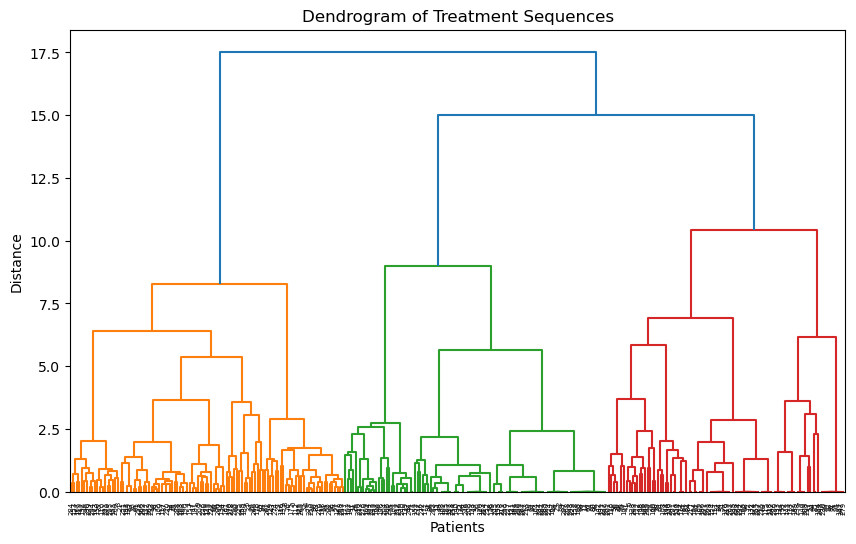

In [88]:
linkage_matrix_nw = linkage(np.abs(distance_matrix_nw), method='ward' ,optimal_ordering=True)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_nw)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [89]:
data_array_nw = df_random_sample.to_numpy()

leaves_order_nw = list(hierarchy.leaves_list(linkage_matrix_nw))
data_array_nw_order = data_array_nw[leaves_order_nw]
colors = ['blue', 'orange', 'green', 'red']
heatmap_nw = go.Heatmap(z=data_array_nw_order, colorscale= 'viridis')

# Créer une figure
fig = go.Figure(data=heatmap_nw)
fig.update_layout(
    title='TCA with Optimal Matching Distance',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

_____

In [8]:
from scipy.spatial.distance import cdist

def optimal_matching_distance(seq1, seq2, substitution_cost_matrix):
    len1, len2 = len(seq1), len(seq2)
    dp = np.zeros((len1 + 1, len2 + 1))

    for i in range(len1+1):
        for j in range(len2+1):
            
            if i == 0:
                dp[i, j] = j
            elif j == 0:
                dp[i, j] = i
            else:
                print(f" i : {i}, j: {j}")
                substitution_cost = substitution_cost_matrix[seq1[i-1], seq2[j-1]]
                dp[i, j] = min(dp[i-1, j] + 1,
                               dp[i, j-1] + 1,
                               dp[i-1, j-1] + substitution_cost)
                print(f"    -> dp[{str(i)}, {str(j)}] :", dp[i, j])

    return dp[len1, len2]

# Exemple de matrice de coût de substitution
substitution_cost_matrix = np.array([[0, 1, 2],
                                     [1, 0, 1],
                                     [2, 1, 0]])

# Exemple de séquences
seq1 = [0, 1, 2]
seq2 = [1, 0, 2]

distance = optimal_matching_distance(seq1, seq2, substitution_cost_matrix)
print("Distance Optimal Matching:", distance)

 i : 1, j: 1
    -> dp[1, 1] : 1.0
 i : 1, j: 2
    -> dp[1, 2] : 1.0
 i : 1, j: 3
    -> dp[1, 3] : 2.0
 i : 2, j: 1
    -> dp[2, 1] : 1.0
 i : 2, j: 2
    -> dp[2, 2] : 2.0
 i : 2, j: 3
    -> dp[2, 3] : 2.0
 i : 3, j: 1
    -> dp[3, 1] : 2.0
 i : 3, j: 2
    -> dp[3, 2] : 3.0
 i : 3, j: 3
    -> dp[3, 3] : 2.0
Distance Optimal Matching: 2.0


In [30]:
def compute_distance_matrix(sequences, substitution_cost_matrix):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = optimal_matching_distance(sequences[i], sequences[j], substitution_cost_matrix)
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

In [63]:
# 4 états possibles :
#   "D" : "diagnostiqué, mais pas suivi",
#   "C" : "suivi, mais pas sous traitement",
#   "T" : "sous traitement, mais infection non contrôlée",
#   "S" : "sous traitement et infection contrôlée"
 
substitution_cost_matrix = [
    [0, 1, 2, 3],  # Coûts pour "D"
    [1, 0, 1, 2],  # Coûts pour "C"
    [2, 1, 0, 1],  # Coûts pour "T"
    [3, 2, 1, 0]   # Coûts pour "S"
]

df_subsets_numeriques_fillna = df_subsets_numeriques.fillna(-1)
sequences = df_subsets_numeriques_fillna.to_numpy()
sequences = [row.tolist() for row in sequences]
len(sequences[0])

In [10]:
df_subsets_numeriques_fillna = df_subsets_numeriques.fillna(-1)
sequences = df_subsets_numeriques_fillna.to_numpy()
sequences = [row.tolist() for row in sequences]

n = len(sequences)
distance_matrix = np.zeros((n, n))

for k in range(n):
    for l in range(k + 1, n):
        len1, len2 = len(sequences[k]), len(sequences[l])
        dp = np.zeros((len1 + 1, len2 + 1))

        for i in range(len1+1):
            for j in range(len2+1):
            
                if i == 0:
                    dp[i, j] = j
                elif j == 0:
                    dp[i, j] = i
                else:
                    print(f" i : {i}, j: {j}")
                    substitution_cost = substitution_cost_matrix[seq1[i-1], seq2[j-1]]
                    dp[i, j] = min(dp[i-1, j] + 1,
                                dp[i, j-1] + 1,
                                dp[i-1, j-1] + substitution_cost)
                    
                    
        
        # distance_matrix[i, j] = optimal_matching_distance(sequences[i], sequences[j], substitution_cost_matrix)
        # distance_matrix[j, i] = distance_matrix[i, j]

 i : 1, j: 1
 i : 1, j: 2
 i : 1, j: 3
 i : 1, j: 4


IndexError: list index out of range

In [69]:
distance_matrix = compute_distance_matrix(sequences, substitution_cost_matrix)
print("Matrice de distances:\n", distance_matrix)

 i : 1, j: 1


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices